In [2]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
# %matplotlib notebook
%matplotlib inline

## Visualizing Corona Cases and Number of Deaths in each State in Germany (data available until 20.03.2020)
### source: https://www.rki.de/DE/Content/InfAZ/N/Neuartiges_Coronavirus/Fallzahlen.html

In [3]:
states = ['Baden-Württemberg','Bayern','Berlin','Brandenburg','Bremen','Hamburg','Hessen','Mecklenburg-Vorpommern',
         'Niedersachsen','Nordrhein-Westfalen','Rheinland-Pfalz','Saarland','Sachsen','Sachsen-Anhalt',
         'Schleswig-Holstein','Thüringen']

num_of_cases = [3668,2960,866,254,142,587,1080,165,1023,3542,938,187,567,188,308,187]

num_of_death = [16,19,1,0,0,0,2,0,0,6,1,0,0,1,1,0]

In [4]:
data_dict = {'states':states, 'num_of_cases':num_of_cases, 'num_of_death':num_of_death}

In [5]:
df = pd.DataFrame(data=data_dict)

In [6]:
df.head()

,states,num_of_cases,num_of_death
0,Baden-Württemberg,3668,16
1,Bayern,2960,19
2,Berlin,866,1
3,Brandenburg,254,0
4,Bremen,142,0


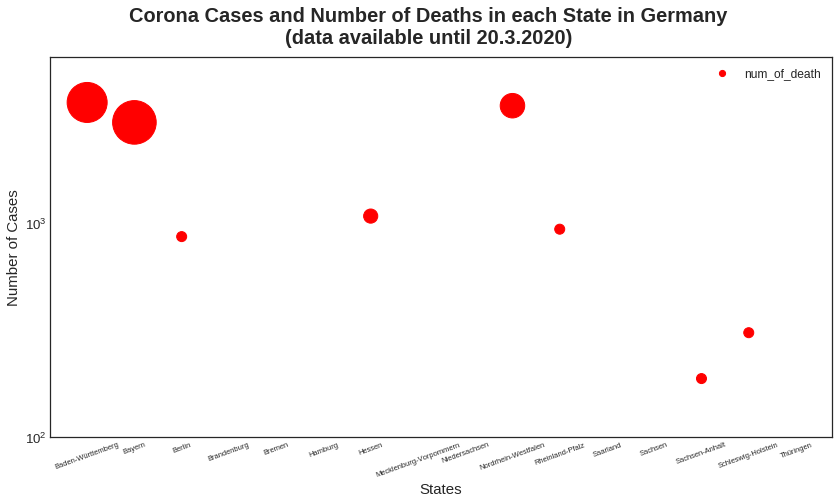

In [33]:
plt.style.use('seaborn-white')

fig = plt.figure()
fig.suptitle('Corona Cases and Number of Deaths in each State in Germany\n(data available until 20.3.2020)', fontsize=20,
            weight='bold')
fig.set_size_inches(14, 7, forward=True)

plt.scatter(df['states'].values, df['num_of_cases'].values, s=100*df['num_of_death'].values, label='num_of_death',
           c='red')

plt.ylabel('Number of Cases', fontsize=15)
plt.xlabel('States', fontsize=15)
plt.gca()

# plt.grid()
# plt.gca().set_ylim(0)
plt.xticks(rotation=20, fontsize=7.5)

plt.yscale('symlog')
plt.ylim(100, 6000)

plt.legend(loc="upper right", fontsize=12, markerscale=0.2)
plt.savefig("cases.png")
plt.show()

## Pie Chart for Corona Gender Portion in Germany (data available until 20.3.2020)
### source: https://npgeo-corona-npgeo-de.hub.arcgis.com/datasets/dd4580c810204019a7b8eb3e0b329dd6_0/data?page=13

In [11]:
file = pd.read_csv("RKI_COVID19.csv")

In [12]:
file.head()

,IdBundesland,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,ObjectId,Meldedatum,IdLandkreis
0,15,Sachsen-Anhalt,SK Magdeburg,A35-A59,M,2,0,154936,2020-03-18T00:00:00.000Z,15003
1,15,Sachsen-Anhalt,SK Magdeburg,A35-A59,W,1,0,154937,2020-03-12T00:00:00.000Z,15003
2,15,Sachsen-Anhalt,SK Magdeburg,A35-A59,W,1,0,154938,2020-03-17T00:00:00.000Z,15003
3,15,Sachsen-Anhalt,SK Magdeburg,A60-A79,M,1,0,154939,2020-03-10T00:00:00.000Z,15003
4,15,Sachsen-Anhalt,SK Magdeburg,A60-A79,M,1,0,154940,2020-03-19T00:00:00.000Z,15003


In [13]:
m = file[file['Geschlecht']=='M'].count().unique()
w = file[file['Geschlecht']=='W'].count().unique()
u = file[file['Geschlecht']=='unbekannt'].count().unique()

In [14]:
w = np.asscalar(w)
m = np.asscalar(m)
u = np.asscalar(u)

/home/engimary/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  """Entry point for launching an IPython kernel.
/home/engimary/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  
/home/engimary/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
print("num of female: ", w)
print("\nnum of male: ", m)
print("\nnum of unknown: ", u)

num of female:  3715

num of male:  4471

num of unknown:  46


In [16]:
def perc(gender):
    if gender == 'w':
        percentage = (w*100)/(len(file.index))
        percentage = np.round_(percentage, decimals=2)

    elif gender == 'm':
        percentage = (m*100)/(len(file.index))
        percentage = np.round_(percentage, decimals=2)

    else:
        percentage = (u*100)/(len(file.index))
        percentage = np.round_(percentage, decimals=2)
    return percentage
    

female_percentage = perc('w')
male_percentage = perc('m')
unknown_percentage = perc('u')

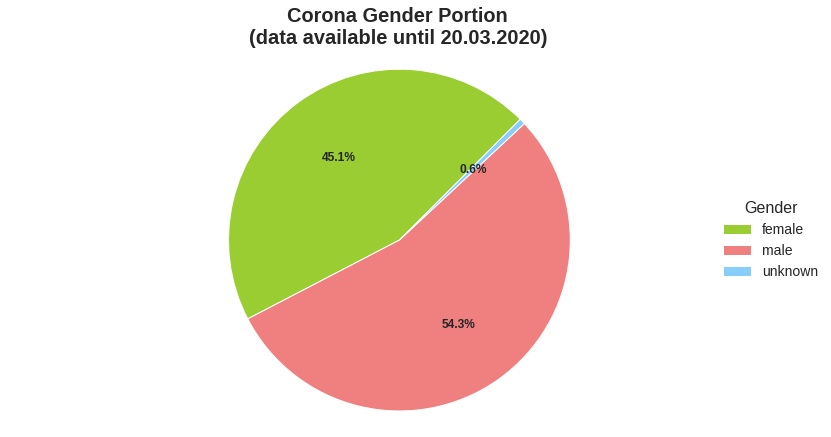

In [17]:
labels = ['female', 'male', 'unknown']
sizes = [female_percentage, male_percentage, unknown_percentage]
colors = ['yellowgreen', 'lightcoral', 'lightskyblue']


fig, ax = plt.subplots()
ax.set_title('Corona Gender Portion\n(data available until 20.03.2020)', fontsize=20, weight='bold')
fig.set_size_inches(14, 7, forward=True)

wedges, texts, autotexts = ax.pie(sizes, autopct='%1.1f%%', startangle=45, colors=colors)

legend = ax.legend(wedges, labels,
          title="Gender",
          loc="center left",
          bbox_to_anchor=(0.9, 0, 0, 1), fontsize=14)

plt.setp(autotexts, size=12, weight="bold")
legend.get_title().set_fontsize('16') 

ax.axis('equal')  
plt.savefig("gender.png")

plt.show()

## Bar Chart for Comparison between Age of current Patients and Dead ones in Germany (data available until 20.3.2020)
### source: https://npgeo-corona-npgeo-de.hub.arcgis.com/datasets/dd4580c810204019a7b8eb3e0b329dd6_0/data?page=13


In [18]:
age = file['Altersgruppe'].unique()
age

array(['A35-A59', 'A60-A79', 'A80+', 'A15-A34', 'A05-A14', 'unbekannt',
       'A00-A04'], dtype=object)

In [19]:
g0_4 = file[file['Altersgruppe']=='A00-A04'].filter(items=['AnzahlFall']).sum()
g0_4 = np.asscalar(g0_4)
g5_14 = file[file['Altersgruppe']=='A05-A14'].filter(items=['AnzahlFall']).sum()
g5_14 = np.asscalar(g5_14)
g15_34 = file[file['Altersgruppe']=='A15-A34'].filter(items=['AnzahlFall']).sum()
g15_34 = np.asscalar(g15_34)
g35_59 = file[file['Altersgruppe']=='A35-A59'].filter(items=['AnzahlFall']).sum()
g35_59 = np.asscalar(g35_59)
g60_79 = file[file['Altersgruppe']=='A60-A79'].filter(items=['AnzahlFall']).sum()
g60_79 = np.asscalar(g60_79)
g80 = file[file['Altersgruppe']=='A80+'].filter(items=['AnzahlFall']).sum()
g80 = np.asscalar(g80)
unknown = file[file['Altersgruppe']=='unbekannt'].filter(items=['AnzahlFall']).sum()
unknown = np.asscalar(unknown)

height1 = [g0_4,g5_14,g15_34,g35_59,g60_79,g80,unknown]

/home/engimary/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  
/home/engimary/anaconda3/envs/hannovermesse2020/lib/python3.6/site-packages/numpy/lib/type_check.py:581: FutureWarning: `item` has been deprecated and will be removed in a future version
  return a.item()
/home/engimary/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  after removing the cwd from sys.path.
/home/engimary/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  
/home/engimary/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  
/home/engimary/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWar

In [20]:
g0_4 = file[file['Altersgruppe']=='A00-A04'].filter(items=['AnzahlTodesfall']).sum()
g0_4 = np.asscalar(g0_4)
g5_14 = file[file['Altersgruppe']=='A05-A14'].filter(items=['AnzahlTodesfall']).sum()
g5_14 = np.asscalar(g5_14)
g15_34 = file[file['Altersgruppe']=='A15-A34'].filter(items=['AnzahlTodesfall']).sum()
g15_34 = np.asscalar(g15_34)
g35_59 = file[file['Altersgruppe']=='A35-A59'].filter(items=['AnzahlTodesfall']).sum()
g35_59 = np.asscalar(g35_59)
g60_79 = file[file['Altersgruppe']=='A60-A79'].filter(items=['AnzahlTodesfall']).sum()
g60_79 = np.asscalar(g60_79)
g80 = file[file['Altersgruppe']=='A80+'].filter(items=['AnzahlTodesfall']).sum()
g80 = np.asscalar(g80)
unknown = file[file['Altersgruppe']=='unbekannt'].filter(items=['AnzahlTodesfall']).sum()
unknown = np.asscalar(unknown)

height2 = [g0_4,g5_14,g15_34,g35_59,g60_79,g80,unknown]

/home/engimary/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  
/home/engimary/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  after removing the cwd from sys.path.
/home/engimary/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  
/home/engimary/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  
/home/engimary/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  # Remove the CWD from sys.path while we load stuff.
/home/engimary/.local/lib/python3.6/site-packages/ipykernel_launcher.py:12: 

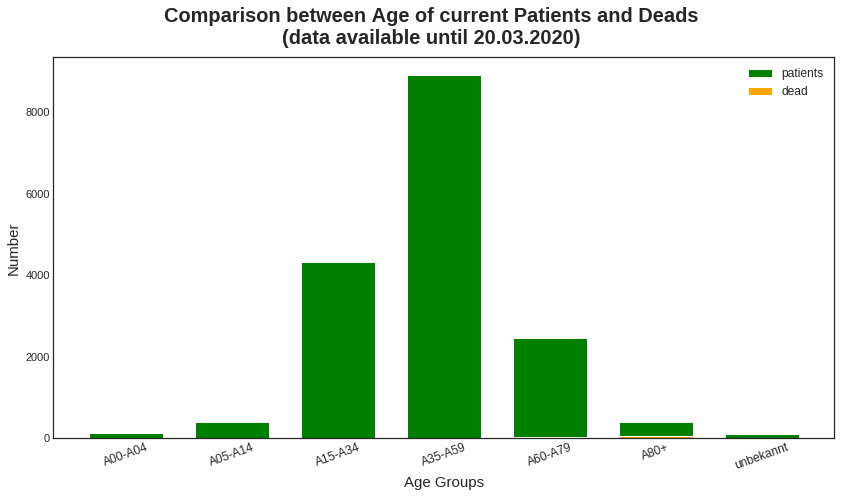

In [21]:
fig = plt.figure()
fig.set_size_inches(14,7, forward=True)
fig.suptitle("Comparison between Age of current Patients and Deads\n(data available until 20.03.2020)", fontsize=20, weight='bold')

bar_width = 0.7

plt.bar(x=np.sort(file['Altersgruppe'].unique()), height=height1, width=bar_width, color='green', label='patients')

plt.bar(x=np.sort(file['Altersgruppe'].unique()), height=height2, width=bar_width, color='orange', label= 'dead')

plt.ylabel('Number', fontsize=15)
plt.xlabel('Age Groups', fontsize=15)
plt.gca()

plt.xticks(rotation=20, fontsize=12)

# plt.yscale('log')
# plt.ylim(0, 5000)

plt.legend(loc="upper right", fontsize=12, markerscale=0.2)
plt.savefig("patients_vs_dead.png")
plt.show()

## Heatmap to show Corona cases in all states of Germany (data available until 20.3.2020)
### source: https://npgeo-corona-npgeo-de.hub.arcgis.com/datasets/dd4580c810204019a7b8eb3e0b329dd6_0/data?page=13


In [22]:
file['Bundesland'].nunique()

17

In [23]:
file['Meldedatum'] = pd.to_datetime(file['Meldedatum'])

In [24]:
file['Date'] = file['Meldedatum'].dt.date

In [25]:
# date_table_agg = file.groupby(['Bundesland','Date']).agg(['sum']).reset_index()
# date_table_agg = date_table_agg.drop(['Lat','Long'],1)
table = file.groupby(['Bundesland','Date'])['AnzahlFall'].sum().reset_index()

In [26]:
table

,Bundesland,Date,AnzahlFall
0,-nicht erhoben-,2020-03-19,1
1,-nicht erhoben-,2020-03-20,1
2,Baden-Württemberg,2020-02-25,2
3,Baden-Württemberg,2020-02-26,5
4,Baden-Württemberg,2020-02-27,2
...,...,...,...
288,Thüringen,2020-03-16,13
289,Thüringen,2020-03-17,24
290,Thüringen,2020-03-18,28
291,Thüringen,2020-03-19,38


In [27]:
states_pivot_table = pd.pivot_table(table, values='AnzahlFall', columns=['Date'], index=['Bundesland'])
states_pivot_table

Date,2020-01-28,2020-01-29,2020-01-31,2020-02-03,2020-02-04,2020-02-06,2020-02-07,2020-02-11,2020-02-12,2020-02-25,...,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20
Bundesland,,,,,,,,,,,,,,,,,,,,,
-nicht erhoben-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
Baden-Württemberg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,137.0,174.0,294.0,323.0,159.0,394.0,566.0,696.0,461.0,106.0
Bayern,2.0,2.0,3.0,1.0,2.0,1.0,1.0,2.0,1.0,NaN,...,101.0,115.0,230.0,180.0,113.0,205.0,394.0,517.0,467.0,325.0
Berlin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,43.0,47.0,59.0,29.0,25.0,60.0,96.0,144.0,181.0,92.0
Brandenburg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.0,20.0,20.0,13.0,20.0,21.0,48.0,35.0,42.0,7.0
Bremen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.0,7.0,10.0,3.0,3.0,1.0,12.0,10.0,41.0,22.0
Hamburg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27.0,40.0,30.0,73.0,72.0,66.0,106.0,80.0,30.0,NaN
Hessen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,34.0,36.0,68.0,72.0,24.0,117.0,156.0,200.0,181.0,137.0
Mecklenburg-Vorpommern,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.0,9.0,8.0,1.0,1.0,14.0,31.0,43.0,32.0,7.0


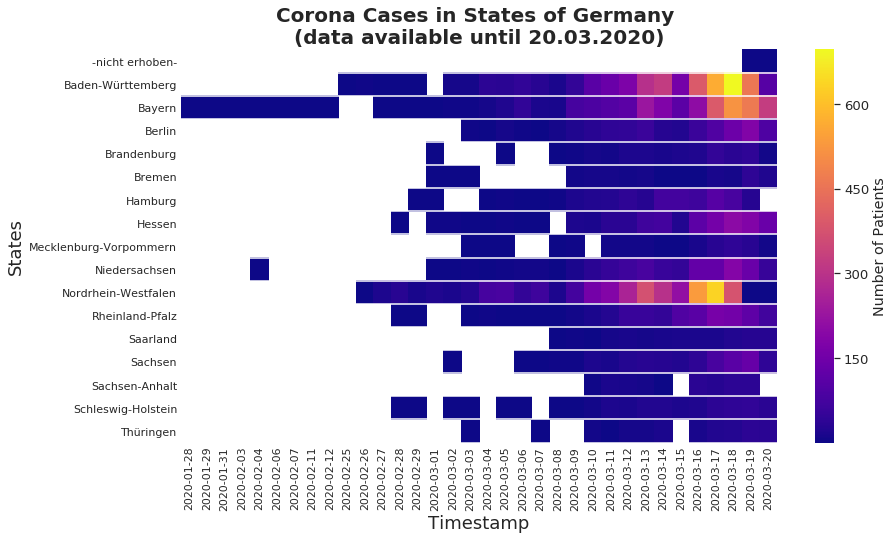

In [28]:
plt.style.use('seaborn-white')
fig, ax = plt.subplots(figsize=(14,7))        
ax.set_title("Corona Cases in States of Germany \n(data available until 20.03.2020)", size=20, weight='bold')
sns.set(font_scale=1.2)

ax = sns.heatmap(states_pivot_table, cmap='plasma', ax=ax, cbar_kws={'label': 'Number of Patients'})
borders = range(1,18)
ax.hlines(borders[:], color='white', *ax.get_xlim())

plt.subplots_adjust(left=0.16, bottom=0.12, top=0.9)
ax.set_xlabel('Timestamp',fontsize=18)
ax.set_ylabel('States',fontsize=18)

plt.savefig("heatmap.png")
